# Maximum likelihood for the generalized Pareto distribution

In this notebook, we will continue with the dataset from the notebook about the `Dataset` object.
The maximum likelihood estimator for the generalized Pareto distribution will be illustrated.
For more information about `Estimate`s, see the notebook about the Hill estimator.

Let's continue with the dataset from the `Dataset` notebook.
It was already determined that the value 15 was a good guess for the threshold.

In [1]:
from evt.dataset import Dataset
from evt.methods.peaks_over_threshold import PeaksOverThreshold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, norm

N_DATAPOINTS = 100000  # number of datapoints in the example set
NORMAL_STD = 5  # standard deviation of the normal distribution
PARETO_SHAPE = 2.5  # shape parameter of the Pareto distribution
THRESHOLD = 15  # threshold in the peaks over threshold method
EXAMPLE_NAME = 'Values'  # for nicer plots
EXAMPLE_INDEX_NAME = 'Index'

np.random.seed(0)  # enforce deterministic behaviour

series = pd.Series(
    norm.rvs(scale=NORMAL_STD, size=N_DATAPOINTS) + pareto.rvs(PARETO_SHAPE, size=N_DATAPOINTS),
    name=EXAMPLE_NAME
)
series.index.name = EXAMPLE_INDEX_NAME

dataset = Dataset(series)

peaks_over_threshold = PeaksOverThreshold(dataset, THRESHOLD)

Create a maximum likelihood estimator object.

In [2]:
from evt.estimators.gpdmle import GPDMLE

mle = GPDMLE(peaks_over_threshold)

The estimator will fit two parameters of the generalized Pareto distribution:

* the tail index,
* the scale parameter.

The location parameter is taken from the threshold of the peaks over threshold approach.

In [3]:
tail_estimate, scale_estimate = mle.estimate()
print('Tail: ', tail_estimate)
print('Scale:', scale_estimate)

Tail:  Estimate(estimate=0.5120819822282731, ci_lower=0.389235722790921, ci_upper=0.6349282416656251, confidence_level=0.95)
Scale: Estimate(estimate=1.956690225955656, ci_lower=1.8094093780261113, ci_upper=2.1039710738852007, confidence_level=0.95)


In our example, the tail index is already known to be 1/2.5 = 0.4.
Confidence intervals are based on the asymptotic behaviour of the variance of the estimate.
Bias is not taken into account.

A quantile-quantile plot of the fitted distribution can be used to investigate quality of fit.

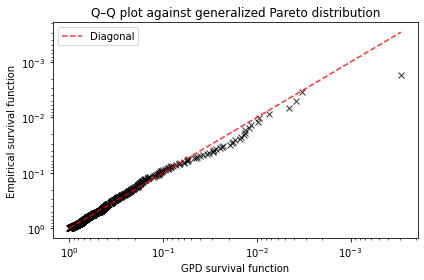

In [4]:
fig, ax = plt.subplots()

mle.plot_qq_gpd(ax)

fig.tight_layout()
plt.show()